this is done by team wall-E 

    by: AHMED KHALED , SHEHAB ASHRAF

In [1]:

import cv2
import numpy as np
from ipywidgets import interact_manual
from IPython.display import display
import math
import random
import matplotlib.pyplot as plt

In [ ]:
# parameters

img_size = (480, 640, 3)
img = np.zeros(img_size)
h, w = img.shape[:2]


# w_top = 220
w_top = 640
w_bottom = 640
# h_top = 280
# h_top = 300
h_top = 330
h_bottom = 480
# w_top = 170
# h_top = 300
# w_bottom = 500
# h_bottom = 430

w_m = 320
src = np.float32([
    (w_m - w_top/2, h_top),
    (w_m - w_bottom/2, h_bottom),
    (w_m + w_bottom/2 , h_bottom),
    (w_m + w_top/2, h_top),
])

dst = np.float32([
    [0, 0],
    [0, h],
    [w, h], 
    [w, 0], 
])


# for hsv thresholding (calculate using trackbars in next cells)
h_min = 0
h_max = 255 
s_min = 0
s_max = 16
v_min = 214
v_max = 244


# to get red color
# h_min = 0
# h_max = 255 
# s_min = 50
# s_max = 255
# v_min = 0
# v_max = 190

params_hsv_white = [0 , 255 , 0 , 16 , 214 , 244]
params_hsv_red = [0 , 255 , 50 , 255 , 140 , 190]



FORWARD_TRACK = 0
BACKWARD_TRACK = 1

FTRACK_STARTING_POSITION = [2.25, 33.5, -13.5]
FTRACK_STARTING_ORIENTATION = [0, 0, -150 * math.pi / 180]

BTRACK_STARTING_POSITION = [3.5, 31, -13.5]
BTRACK_STARTING_ORIENTATION = [0, 0, 30 * math.pi / 180]


straight_img = cv2.imread('straight.jpg')
straight_img = cv2.cvtColor(straight_img, cv2.COLOR_BGR2RGB)
straight_img = cv2.resize(straight_img, (640, 480))
right_curved_img = cv2.imread('right_curved.jpg')
right_curved_img = cv2.cvtColor(right_curved_img, cv2.COLOR_BGR2RGB)
right_curved_img = cv2.resize(right_curved_img, (640, 480))
left_curved_img = cv2.imread('left_curved.jpg')
left_curved_img = cv2.cvtColor(left_curved_img, cv2.COLOR_BGR2RGB)
left_curved_img = cv2.resize(left_curved_img, (640, 480))

In [3]:
import cv2
straight_img = cv2.imread('straight.jpg')
straight_img.shape[1]

637

In [3]:
def add_points(img, src):
    img2 = np.copy(img)
    color = [255, 0, 0] # Red
    thickness = -1
    radius = 15
    x0, y0 = src[0]
    x1, y1 = src[1]
    x2, y2 = src[2]
    x3, y3 = src[3]
    cv2.circle(img2, (int(x0), int(y0)), radius, color, thickness)
    cv2.circle(img2, (int(x1), int(y1)), radius, color, thickness)
    cv2.circle(img2, (int(x2), int(y2)), radius, color, thickness)
    cv2.circle(img2, (int(x3), int(y3)), radius, color, thickness)

    return img2

def add_lines(img, src):
    img2 = np.copy(img)
    color = [255, 0, 0] # Red
    thickness = 2
    x0, y0 = src[0]
    x1, y1 = src[1]
    x2, y2 = src[2]
    x3, y3 = src[3]
    cv2.line(img2, (int(x0), int(y0)), (int(x1), int(y1)), color, thickness)
    cv2.line(img2,(int(x1), int(y1)), (int(x2), int(y2)), color, thickness)
    cv2.line(img2, (int(x2), int(y2)), (int(x3), int(y3)), color, thickness)
    cv2.line(img2,(int(x3), int(y3)), (int(x0), int(y0)), color, thickness)
    return img2

In [4]:

def warper(img ,  src):
    
    # Compute and apply perpective transform
    img_size = (img.shape[1], img.shape[0])
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_NEAREST )  # keep same size as input image

    return warped

def unwarper(img , src):
    
    # Compute and apply inverse perpective transform
    img_size = (img.shape[1], img.shape[0])
    Minv = cv2.getPerspectiveTransform(dst, src)
    unwarped = cv2.warpPerspective(img, Minv, img_size, flags=cv2.INTER_NEAREST)
    
    return unwarped

In [5]:
# img = cv2.imread('straight.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, (640, 480))

# def transform(img , w_top , w_bottom , h_top , h_bottom):
#     w_m = 320
#     src = np.float32([
#         (w_m - w_top/2, h_top),
#         (w_m - w_bottom/2, h_bottom),
#         (w_m + w_bottom/2 , h_bottom),
#         (w_m + w_top/2, h_top),
#     ])

#     dst = np.float32([
#         [0, 0],
#         [0, h],
#         [w, h], 
#         [w, 0], 
#     ])
#     warped = warper(img  , src)
#     imgSrc = img.copy()
#     imgDst = warped.copy()
    
#     src_points_img = add_points(imgSrc, src)
#     src_points_img = add_lines(src_points_img, src)
#     dst_points_warped = add_points(imgDst, dst)
#     dst_points_warped = add_lines(dst_points_warped, dst)

#     ### Plot the source points on the original image and the warped image
#     # f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
#     # f.tight_layout()
#     # ax1.imshow(src_points_img)
#     # ax1.set_title('Source Points', fontsize=25)
#     # ax2.imshow(dst_points_warped)
#     # ax2.set_title('Warped Points', fontsize=25)
#     # plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#     return np.hstack((src_points_img, dst_points_warped))
    
# plt.imshow(transform(img, w_top , w_bottom , h_top , h_bottom))



    

In [6]:
# # img = cv2.imread('left_curved.jpg')
# # img = cv2.imread('right_curved.jpg')
# img = cv2.imread('right_curved.jpg')
# print(img.shape)
# # img = cv2.imread('straight.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, (640, 480))
# def interactive_mask(w_top = 210,
#                      w_bottom = 580,
#                      h_top = 325,
#                      h_bottom = 450,
#                      ):
    
            
#     combined = transform(img, w_top , w_bottom , h_top , h_bottom)


        
#     plt.figure(figsize=(10,10))
#     plt.imshow(combined,cmap='gray')

# interact_manual(interactive_mask, w_top = (0,640,1), w_bottom = (0,640,1), h_top = (0,480,1), h_bottom = (0,480,1))



In [7]:

def hsv_img(img, h_min , h_max, s_min, s_max, v_min, v_max):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lower  = np.array([h_min, s_min, v_min])
    upper = np.array([h_max, s_max, v_max])
    mask = cv2.inRange(img_hsv, lower, upper)
    # result = cv2.bitwise_and(img, img, mask=mask)
    mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    # hstack = np.hstack((img, mask, result))
    # return hstack
    return mask



def get_white_and_red(img):
    white = hsv_img(img , *params_hsv_white)
    red = hsv_img(img , *params_hsv_red)
    compined_img = cv2.bitwise_or(white, red)
    kernel = np.ones((15,18),np.uint8)
    closing = cv2.morphologyEx(compined_img, cv2.MORPH_CLOSE, kernel)
    return closing



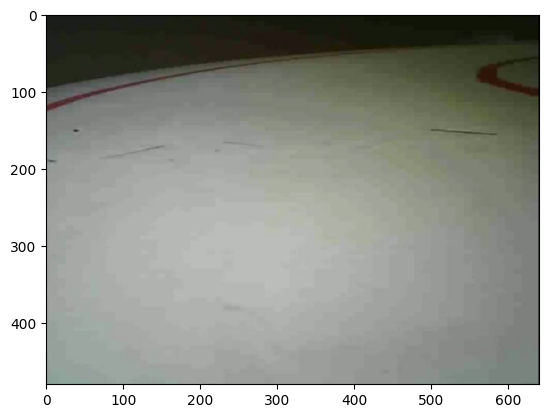

interactive(children=(IntSlider(value=0, description='h_min', max=255), IntSlider(value=255, description='h_ma…

<function __main__.interactive_mask(h_min=0, h_max=255, s_min=0, s_max=16, v_min=214, v_max=244)>

In [11]:
img = cv2.imread('test_img.png' )
img = cv2.resize(img, (640, 480))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = warper(img, src)
# img = warper(straight_img, src)
# img = cv2.cvtColor(bad_images[37], cv2.COLOR_BGR2RGB)

plt.imshow(img )
plt.show()
# run to tweak the mask
def interactive_mask(h_min = 0, h_max = 255 , s_min = 0, s_max = 16 , v_min = 214, v_max = 244):
    combined = hsv_img(img, h_min , h_max, s_min, s_max, v_min, v_max)
    plt.figure(figsize=(10,10))
    plt.imshow(combined,cmap='gray')

interact_manual(interactive_mask, h_min=(0,255), h_max=(0,255), s_min=(0,255), s_max=(0,255), v_min=(0,255), v_max=(0,255))
# h_min = 0
# h_max = 255 
# s_min = 0
# s_max = 16
# v_min = 214
# v_max = 244

In [35]:
def histogram(org_img , split = 1 , plot = False , min_per = 0.4  ,return_img = False ):
    img = org_img.copy()
    # bottom_half = img[img.shape[0]//2:,:]
    # histogram = np.sum(bottom_half, axis=0)
    if split == 1:
        histogram = np.sum(img, axis=0)[:,0]
    else:
        histogram = np.sum(img[img.shape[0]//split:,:], axis=0)[:,0]

    max_val = np.max(histogram)
    min_val = min_per * max_val
    
    ind_arr = np.where(histogram >= min_val)
    base_point = int(np.average(ind_arr))
    return base_point 
    # if plot:
    #     plt.figure(figsize=(5,5))
    #     plt.imshow(img)
    #     plt.show
    #     plt.figure(figsize=(5,5))
    #     plt.plot(histogram , color = 'r')
    #     plt.show()
    # # plot the histogram


    # if return_img: 
    #     img_hist = np.zeros_like(img)
    #     for x , intensity in enumerate(histogram):
    #         cv2.line(img_hist, (x, img.shape[0]), (x, img.shape[0] - int(intensity)//255//split), (255,0,0), 1)
    #         cv2.circle(img_hist, (base_point, img.shape[0]), 10, (0,0,255), -1)
    #     return base_point , histogram , img_hist
    
    # return base_point , histogram


# histogram(hsv_img(warper(left_curved_img , src) , 0, 255, 0, 255, 190, 255) ,split = 1 , plot = True)
# hist.shape



In [36]:
red_points = []
blue_points = []
black_points = []
def calculate_curve(hsv_img, plot = False):
    hsv_img = hsv_img.copy()
    
    # center_point ,_, bottom_hist_img = histogram(hsv_img , split = 4, return_img=True , plot = True )
    # curve_mid_point ,_, full_hist_img = histogram(hsv_img , split = 1, return_img=True , plot = True )
    # center_point= histogram(hsv_img , split = 4, return_img=True , plot = True  , min_per=0.3)
    curve_mid_point = histogram(hsv_img , return_img=True , plot = False , min_per=0.8 )
    # track_mid_point = histogram(hsv_img , return_img=True , plot = False , min_per=0.5 , split = 4  )
    center_point = 319
    diff = center_point - curve_mid_point
    # curve_list.append(diff)
    # if len(curve_list) > 5:
    #     curve_list.pop(0)

    # avg_curve = sum(curve_list) / len(curve_list)    
    
    # if plot:
    #     plt.imshow(full_hist_img)
    #     plt.show()
    #     plt.imshow(bottom_hist_img)
    #     plt.show()
    
    # print(f'base point is {center_point} and track_mid_point is {curve_mid_point}')
    # print(f'difference is {center_point - curve_mid_point}')
    
    # add full_hist_img and bottom_hist_img to the original image with different colors to see the difference 
    # and add the base_point , track_mid_point to the image
    # base point is blue and curve_mid_point is red and the difference is green and bottom_hist_img is yellow and full_hist_img is purple
    # res = cv2.addWeighted(hsv_img, 1, full_hist_img, 0.5, 0)
    # res = cv2.addWeighted(res, 1, bottom_hist_img, 0.5, 0)
    res = hsv_img.copy()
    cv2.circle(res, (center_point, res.shape[0]-10), 20, (0,0,255), -1)
    cv2.circle(res, (curve_mid_point, res.shape[0]-10), 20, (0,200,0), -1)
    # cv2.circle(res, (track_mid_point, res.shape[0]), 10, (0,0,0), -1)
    cv2.line(res, (center_point, res.shape[0]), (curve_mid_point, res.shape[0]), (0,200,0), 5)
    res_annotated = res.copy()
    cv2.putText(res_annotated,
            f"center_point: {center_point} curve_point: {curve_mid_point} diff: {diff}",
            (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.8,
            (0, 255, 0),
            2,
            cv2.LINE_AA,
        )
    # red_points.append(curve_mid_point)
    # blue_points.append(center_point)
    # black_points.append(track_mid_point)
    # if plot:
    #     plt.figure(figsize = (5,5))
    #     plt.imshow(res)
    #     plt.show
    # return avg_curve , res
    return diff , res , res_annotated

# img = calculate_curve(hsv_img(warper(straight_img , src) , h_min , h_max, s_min, s_max, v_min, v_max) , plot = True)
# img = calculate_curve(hsv_img(warper(left_curved_img , src) , h_min , h_max, s_min, s_max, v_min, v_max) , plot = True)
# _,_,_ = calculate_curve(hsv_img(warper(right_curved_img , src) , h_min , h_max, s_min, s_max, v_min, v_max) , plot = True)

In [37]:

def extract_lane(img_hsv , prev_lane ):
    img_hsv = img_hsv.copy()
    # _,thresh = cv2.threshold(img_hsv, 1, 255, cv2.THRESH_BINARY)
    imgray = cv2.cvtColor(img_hsv, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # print(f'len of contours is {len(contours)}')
    
    # now get the biggest contour
    
    # biggest_contour = max(contours, key = cv2.contourArea)
    try:
        # biggest_contour = max(contours, key = cv2.contourArea)
        # instead of getting the biggest contour we will get the contour that is closest to the previous contour
        results = [cv2.bitwise_and(prev_lane, cv2.drawContours(np.zeros_like(img_hsv), [contour], -1, (255,255,255), -1)) for contour in contours]
        idx = np.argmax([np.sum(x[:,:,1]) for x in results])
        # print(f'number of contours is {len(contours)} and the biggest contour is {idx} + results {[np.sum(x[:,:,1]) for x in results]}')

        contour = contours[idx]
        image_mask = np.zeros_like(img_hsv)
        output = cv2.drawContours(image_mask, [contour], -1, (255,255,255), -1)
        flag = False
    except:
        flag = True   
        output = img_hsv
    
    
    # now mask the image with the biggest contour
    # for countour in contours:
        
    #     output = cv2.drawContours(image_mask, [countour], -1, (255,255,255), -1)
    
    # for countour in contours:
    #     if cv2.contourArea(countour) > 1000:
    #         output = cv2.drawContours(image_mask, [countour], -1, (255,255,255), -1)
    #         center = cv2.moments(countour)
    #         cv2.circle(output, (int(center["m10"] / center["m00"]), int(center["m01"] / center["m00"])), 10, (0,0,255), -1)
    
    # get countour center
    # center = cv2.moments(biggest_contour)
    # cv2.circle(output, (int(center["m10"] / center["m00"]), int(center["m01"] / center["m00"])), 10, (0,0,255), -1)
    # center = int(center["m10"] / center["m00"])
    # if abs(center - prev_countour_center[0]) > diff_threshold[0] and prev_countour_center[0] != -1:
    #     center = np.average([center , prev_countour_center[0]])
    #     output = 1/2 * (output + prev_img[0])
    # prev_countour_center[0]  = center
    # prev_img[0] = output
    # plt.imshow(output , cmap = 'gray')

    return output  ,flag  


In [38]:
img= hsv_img(warper(straight_img , src) , h_min , h_max, s_min, s_max, v_min, v_max)
histogram(img)
img= hsv_img(warper(left_curved_img , src) , h_min , h_max, s_min, s_max, v_min, v_max)
histogram(img)
img= hsv_img(warper(right_curved_img , src) , h_min , h_max, s_min, s_max, v_min, v_max)
histogram(img)


306

In [39]:
import time
import numpy as np
# pylint: disable=import-error
import cv2
import matplotlib.pyplot as plt
from machathon_judge import Simulator, Judge

class FPSCounter:
    def __init__(self):
        self.frames = []

    def step(self):
        self.frames.append(time.monotonic())

    def get_fps(self):
        n_seconds = 5

        count = 0
        cur_time = time.monotonic()
        for f in self.frames:
            if cur_time - f < n_seconds:  # Count frames in the past n_seconds
                count += 1

        return count / n_seconds

## Classical control (PID CONTROLLER)

In [ ]:
# steer_list = [0 ,0 ,0 ]
# throttle_list = [0 ,0 ,0]
# curve_list = [0 ,0 ,0]
# PID_STEER_SPACE = np.linspace(0, P_const * MAX_STEER_RADIAN +  D_const * MAX_STEER_RADIAN, 100)
steer_diff_threshold = 1
throttle_diff_threshold = 1
MAX_STEER_RADIAN = 0.5236
steering_space = np.linspace(0, MAX_STEER_RADIAN,  30) 
# throttling_space = np.linspace(11, 5, 100)  
high_steer_space = np.linspace(0.4, MAX_STEER_RADIAN, 50)
MAX_THROTTLE = 25
high_throttle_space = np.linspace(25, 8, 50)
# Integration = [0]
# Integration_l = [0]
prev_prev_steer = [0]
P_const = 1.5
D_const = 27
I_const = 0.000

avg_d_list = []


# D_const = 2.55
start_counter = [300]

def calculate_steering(curve , prev_steering):
    steering = curve / 320.0
    D_error = steering - prev_prev_steer[0]
    prev_prev_steer[0] = steering
    Diff_error_list.append(D_error)
    # D_error = average of last 10 D_errors
    # D_error = np.mean(Diff_error_list[-1:])
    
    steering =  (P_const*steering  + D_const * D_error)

    # prev_prev_steer[0] = prev_steering
    # Integration_l.append(Integration_l[-1] + steering)
    # if len(Integration_l) > 100:
    #     Integration_l.pop(0)
    # I_error = (Integration_l[-1])
    # Integ_error_list.append(I_error)
    # steering = P_const*steering + I_const * I_error + D_const * D_error

    if abs(curve) < 70:
        steering = 0.0
    
    # if abs(curve) < 105:
    #     steering = steering * 0.8

    steering = np.interp(steering,(- 1, 1), (- 0.5236, 0.5236))
    return steering


def calculate_throttle(steering , prev_speed):

    throttle = MAX_THROTTLE
    
    
    if np.abs(steering) > 0.4:
        closest_index = np.argmin(np.abs(high_steer_space - abs(steering)))
        throttle = high_throttle_space[closest_index]
        
    if (start_counter[0] > 0):
        throttle = MAX_THROTTLE
    start_counter[0] -= 1

    # throttle = 10
    return throttle


def get_steering_throttle(curve , prev_steering , prev_speed):
    
    steering = calculate_steering(curve,prev_steering)
    throttle = calculate_throttle(steering , prev_speed)
    return steering , throttle


In [40]:
# steer_list = [0 ,0 ,0 ]
# throttle_list = [0 ,0 ,0]
# curve_list = [0 ,0 ,0]
# steer_diff_threshold = 1
# throttle_diff_threshold = 1
# steering_space = np.linspace(0, 3.2, 100) 
# throttling_space = np.linspace(1.2, 0.0, 100)  

# Integration_l = [0]
# prev_prev_steer = [0]
# p_const = 0.7
# I_const = 0.00001
# D_const =  4.00
# prev_curve = [0]
def get_steering_throttle_modified(curve , prev_steering , prev_speed):
    
    # prev_curve.append(curve)
    # if len(prev_curve) > 3:
    #     prev_curve.pop(0)
        
    # steering = np.average(prev_curve) / 100.0 
    steering = curve / 100.0
    
    # D_error = prev_steering - prev_prev_steer[0]
    # prev_prev_steer[0] = prev_steering
    D_error = steering - prev_steering

    I_error = np.sum(Integration_l) + prev_steering
    Integration_l.append(prev_steering)
    # if len(Integration_l) > 200:
        # Integration_l.pop(0)
        
    # I_error = Integration[0] + prev_steering
    # Integration[0] = Integration[0] + prev_steering
    

    steering = p_const*steering + I_const * I_error + D_const * D_error
    
    
    if abs(curve) < 80 :
        steering = 0.0
    # elif abs(curve) < 100 :
    #     steering = steering/1.5
    # elif abs(curve) < 120 :
    #     steering = steering/2
        
    
    # get the index of the closest value to the steering angle in the steering space
        


    
    steering = steering *  0.5236  / 4.7
    # simulator.set_car_velocity(throttle * 9.4)
        
    closest_index = np.argmin(np.abs(steering_space - abs(steering)))
    throttle = throttling_space[closest_index] /1
    # elif throttle > 1.1:
    #     throttle = 8
    # elif throttle > 1.0:
    #     throttle = 6
    if throttle > 0.7:
        throttle = 100
    elif throttle > 0.5:
        throttle = 8
    elif throttle > 0.3:
        throttle += 1.5

    # elif throttle > 0.8:
    #     throttle = 1.6
    else :
        throttle += 0.2
    
    if prev_speed<6.5 :
        throttle = (throttle * 9.4)
    else :
        throttle = 2.7


    # if abs(steering) > 2.7:
    #     steering = 2.7 * np.sign(steering)

    return steering, throttle

In [41]:
Integration = [0]
prev_prev_steer = [0]
max_curve = 320
max_steer = 0.5236
max_throttle = 2
max_speed = 7.5

# steer_space = np.linspace(0, 10 * max_steer, 30)
# throttle_space = np.linspace(max_throttle, 0.1, 30)

def PID_contoller(curve , prev_steer , prev_throttle):
    
    
    # steer = curve/100
    
    P_const = 8 * max_steer / max_curve
    P_error = curve

    I_const = 0
    I_error = Integration[0] + prev_steer
    Integration[0] = Integration[0] + prev_steer

    D_const = 1.5
    D_error = prev_steer - prev_prev_steer[0]
    prev_prev_steer[0] = prev_steer

    new_steer = P_const * P_error - I_const * I_error - D_const * D_error
    # print( max_speed,new_steer )
    # new_throttle = 10 * (0.2 + 0.8 * 1 / (1 + 2.7183*(15.5* (new_steer - 0.3))))
    
    
    # steer = abs(new_steer)
    # if steer < 0.2:
    #     steer = 0
    # closest_index = np.argmin(np.abs(steer_space - steer))
    # new_throttle = throttle_space[closest_index]
    temp = new_steer /2
    new_throttle = 1.5
    # if abs(temp) < 0.2:
    #     new_steer = 0
    if abs(temp) > 2:
        new_throttle = 0.1
    elif abs(temp) > 1.5:
        new_throttle = 0.3
    elif abs(temp) > 1:
        new_throttle = 0.5
    


    return new_steer , new_throttle

In [42]:
def plot_fps(fps_list):
    plt.plot(fps_list , label = "fps")
    plt.title(f'min = {np.min(fps_list)}, mean = {round(np.mean(fps_list) , 2)} , max = {np.max(fps_list)} ')
    plt.show()



def plot_parameters(curve_list ,Diff_error_list, steer_list , throttle_list):
    # first convert all lists to range(-1 , 1)
    curve_list = [x / 100.0 for x in curve_list]
    Diff_error_list = [x * 3.0 for x in Diff_error_list]
    steer_list = [x  for x in steer_list]
    throttle_list = [x  for x in throttle_list]
    # plot each parameter with different color
    
    # plot the three parameters on different subplots
    fig, axs = plt.subplots(3, figsize=(20, 10))
    axs[0].plot(curve_list , label = "curve" , alpha = 0.6)
    axs[0].plot(Diff_error_list , label = "Diff_error" , alpha = 0.7)
    axs[1].plot(steer_list , label = "steer" , alpha = 0.8)
    # axs[1].plot(Integ_error_list , label = "Integ_error_list" , alpha = 0.5)
    axs[2].plot(throttle_list , label = "throttle")
    
    # show grid lines on all subplots
    axs[0].grid()
    axs[1].grid()
    axs[2].grid()
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    # show grid on the plots
    plt.show()

# plot_parameters(curve_list , steer_list , throttle_list)

In [43]:

def run_car(simulator: Simulator) -> None:
    
    fps_counter.step()

    # Get the image and show it
    img = simulator.get_image()
    img_size = img.shape
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    temp = img.copy()
    
    fps = fps_counter.get_fps()
    fps_list.append(fps)

    true_steering, true_velocity = simulator.get_state() # Get the state of the car (steering, velocity)
    prev_velocities.append(true_velocity)
    if len(prev_velocities) > 60:
        prev_velocities.pop(0)
        if sum(prev_velocities) < 0.1:
            # start againg the car
            # first choose a random track
            track_id = random.choice([FORWARD_TRACK, BACKWARD_TRACK])
            track_starting_position = (FTRACK_STARTING_POSITION if track_id == FORWARD_TRACK else BTRACK_STARTING_POSITION)
            track_starting_orientation = (FTRACK_STARTING_ORIENTATION if track_id == FORWARD_TRACK else BTRACK_STARTING_ORIENTATION)
            print(f"Resetting car to track {track_id} starting position {track_starting_position} starting orientation {track_starting_orientation}")
            simulator.reset_car_pose(position = track_starting_position, orientation= track_starting_orientation)
            # reset the prev_velocities
            prev_velocities.clear()
    state  = [prev_steering[0], prev_speed[0]]
    
    state_txt = f'steering: {round(true_steering, 2)} velocity: {round(true_velocity, 2)}'
    # cv2.putText(
    #     img,
    #     f"FPS: {fps:.2f}  {state_txt}",
    #     (10, 30),
    #     cv2.FONT_HERSHEY_SIMPLEX,
    #     0.8,
    #     (0, 255, 0),
    #     2,
    #     cv2.LINE_AA,
    # )
    
    
    
    wraped_img = warper(img , src) 
    
    
    
    img_hsv  = hsv_img(wraped_img, h_min , h_max, s_min, s_max, v_min, v_max)
    
    
    np.reshape(img_hsv, (img_size[0], img_size[1], 3))
    # img_lane_only  , bad_imgs_flag = extract_lane(img_hsv)
    img_lane_only  , bad_imgs_flag = extract_lane(img_hsv , prev_lane_image[0])
    # if bad_imgs_flag :
        # img_lane_only = prev_lane_image[0]
    prev_lane_image[0] = img_lane_only
    # img_lane_only = get_white_and_red(wraped_img)
    # if bad_imgs_flag :
    # bad_images.append(img_hsv)
    # if len(bad_images) > 50:
    #     bad_images.pop(0)
    # bad_images_warped.append(wraped_img)
    # if len(bad_images_warped) > 50:
    #     bad_images.pop(0)
        


    curve ,curve_unannottated , curve_annottated = calculate_curve(img_lane_only)

    curve_unwarped = unwarper(curve_unannottated, src)
    


    steering , throttle = get_steering_throttle(curve , state[0] , state[1])
    # steering , throttle = get_steering_throttle_modified(curve , state[0] , state[1])
    # steering , throttle = PID_contoller(curve , state[0] , state[1])
    
    
    # add image_with_curve to the original image
    final_img = cv2.addWeighted(temp, 0.6, curve_unwarped, 1, 0 )
    
    cv2.putText(
        final_img,
        # f"FPS: {fps:.2f} Steering:{steering:.3f} Throttle:{throttle:.3f} ",
        f"FPS: {fps:.2f}  {state_txt}",

        # f"Curve:{curve:.2f} Steering:{steering:.3f} Throttle:{throttle:.3f} ",
        (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.8,
        (0, 255, 0),
        2,
        cv2.LINE_AA,
    )    
                    

    if visual == 'pipeline':
        row_1 =  np.hstack((img , wraped_img  ,img_hsv )) 
        row_2 =  np.hstack((final_img , curve_unwarped , curve_annottated ))
        res = np.vstack((row_1, row_2))
        cv2.imshow("image", res)
        cv2.waitKey(1)

    
    if visual == 'meters':
        # res = np.hstack((img, final_img))
        res = final_img
        # create an image with throttle meter as a verical bar and steering meter as half circle
        meters_img = np.zeros_like(res)
        cv2.rectangle(meters_img, (meters_img.shape[1]-100, meters_img.shape[0]), (meters_img.shape[1], meters_img.shape[0]-int(throttle/15*meters_img.shape[0])), (255, 0, 0), -1)
        cv2.ellipse(meters_img, (int(meters_img.shape[1]/2), int(meters_img.shape[0]/2)), (int(meters_img.shape[1]/2.5), int(meters_img.shape[0]/2.5)), 0, -90, int(-steering*180/np.pi - 90), (0, 255, 0), -1)
        res = np.vstack((res, meters_img))
        cv2.imshow("image", res)
        cv2.waitKey(1)

    
    
    # add steer and throttle meters on final_img 
    

    if visual == 'final':
        cv2.ellipse(final_img, (319 , 450), (int(final_img.shape[1]/6), int(final_img.shape[0]/6)), 0, -90, int(-steering*180/np.pi - 90), (0, 200, 0), -1)
        cv2.imshow("image", final_img)
        cv2.waitKey(1)
    

    
    
    simulator.set_car_steering(steering)
    simulator.set_car_velocity(throttle )

    prev_steering[0] = steering
    prev_speed[0] = throttle
    curve_list.append(curve)
    steer_list.append(steering)
    throttle_list.append(throttle)
    simulation_images.append(final_img)
    




In [44]:

def run_car_max_fps(simulator: Simulator) -> None:
    
    fps_counter.step()

    img = simulator.get_image()
    img_size = img.shape
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    temp = img.copy()
    
    fps = fps_counter.get_fps()
    fps_list.append(fps)

    state  = [prev_steering[0], prev_speed[0]]

    
    wraped_img = warper(img , src) 
    
    
    
    img_hsv  = hsv_img(wraped_img, h_min , h_max, s_min, s_max, v_min, v_max)
    np.reshape(img_hsv, (img_size[0], img_size[1], 3))
    img_lane_only  , bad_imgs_flag = extract_lane(img_hsv , prev_lane_image[0])
    prev_lane_image[0] = img_lane_only
    

        


    curve ,curve_unannottated , curve_annottated = calculate_curve(img_lane_only)

    curve_unwarped = unwarper(curve_unannottated, src)
    


    steering , throttle = get_steering_throttle(curve , state[0] , state[1])

    
    # cv2.imshow("image", final_img)
    # cv2.waitKey(1)
    

    simulator.set_car_steering(steering)
    simulator.set_car_velocity(throttle )

    prev_steering[0] = steering
    prev_speed[0] = throttle
    curve_list.append(curve)
    steer_list.append(steering)
    throttle_list.append(throttle)

    




In [ ]:
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
fps_counter = FPSCounter()

# You should modify the value of the parameters to the judge constructor
# according to your team's info
judge = Judge(team_code="84S5jIc1x", zip_file_path="last_day_soln_2.zip")

# Pass the function that contains your main solution to the judge
judge.set_run_hook(run_car)
# judge.set_run_hook(run_car_max_fps)

# Start the judge and simulation
fps_list = []
curve_list = []
Diff_error_list = []
Integ_error_list = []
steer_list = []
throttle_list = []
# bad_images = []
# bad_images_warped = []
prev_steering = [0]
prev_speed = [0]
fps_list = []
prev_lane_image = [np.ones((480 , 640 , 3))]
visual = 'final'   # 'final' or 'pipeline' or 'meters'
simulation_images = []
prev_velocities = 20*[10]
# make a timer to calculate the run time of the judge

start_time = time.time()
judge.run(send_score=False, verbose=True)
# judge.run_untill_stop()
end_time = time.time()

print(f'Total run time: {end_time - start_time - 6} seconds ')
plot_fps(fps_list)
plot_parameters(curve_list,Diff_error_list , steer_list,throttle_list)
# goal --> (30,30)


### RL ALGORITHM (PPO AGENT) 

In [15]:
import gym
from gym import spaces
import numpy as np

N_CHANNELS = 3
HEIGHT = 480
WIDTH = 640
max_steer = 0.5236

steer_possible = np.linspace(-max_steer, max_steer, 11)
throttle_possible = np.linspace(1, 20, 10)
steer_throttle_map = np.array(np.meshgrid(steer_possible, throttle_possible)).T.reshape(-1, 2)
# steer_throttle_map

In [42]:
def curve_from_original_image(img , prev_lane_img):
    # convert to gray scale
    wraped_img = warper(img , src) 
    img_hsv  = hsv_img(wraped_img, h_min , h_max, s_min, s_max, v_min, v_max)
    curr_lane_img  , bad_imgs_flag = extract_lane(img_hsv , prev_lane_img)
    if visual == true:
        return calculate_curve(curr_lane_img)[0] , curr_lane_img
    return calculate_curve(curr_lane_img)[0] , curr_lane_img



In [58]:

class CAR_ENV(gym.Env):
    
    def __init__(self):
        super(CAR_ENV, self).__init__()
        self.total_reward = 0
        self.action_space = spaces.Discrete(11)
        # observation is curve , prev_steering , prev_speed  
        self.observation_space = spaces.Box(low = -1.0 , high = 1.0 , shape = (3,) , dtype=np.float32)      
    def step(self, action):
        
        self.total_steps += 1
        if self.total_steps > 1500:
            self.done = True
            print('reach max steps')
        # Execute one time step within the environment
        # steer , throttle = steer_throttle_map[action]
        steer = steer_possible[action]
        throttle = 9
        self.simulator.set_car_steering(steer)
        # self.simulator.set_car_steering(0)
        self.simulator.set_car_velocity(throttle)

        # create observation : observation is rgb image with previous steering and throttle
        img = self.simulator.get_image() 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        curve , self.prev_lane_image = curve_from_original_image(img , self.prev_lane_image)
        prev_steer , prev_velocity = self.simulator.get_state()
        
        # reward calculation
        self.prev_velocities.append(prev_velocity)
        if len(self.prev_velocities) > 20:
            self.prev_velocities.pop(0)
            if np.mean(self.prev_velocities) < 0.5:
                self.done = True
                

            

        if abs(curve) < 80:
            step_reward =  10
        elif abs(curve) < 100:
            step_reward =  5
        elif abs(curve) < 150:
            step_reward =  1
        elif abs(curve) < 200:
            step_reward =  -1
        elif abs(curve) < 250:
            step_reward =  -2
        else :
            step_reward =  -5            
        step_reward += prev_velocity
        step_reward = step_reward / 10
        
        if (prev_velocity) < 0.5:
            step_reward = -20

        self.total_reward += step_reward
        
        # visualize the image
        text = f'curve:{curve},s:{round(prev_steer, 2)},v:{round(prev_velocity, 2)},step:{self.total_steps},R:{round(step_reward,2)},TR:{round(self.total_reward, 2)}'
        cv2.putText(img, text, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 1, cv2.LINE_AA)
        cv2.imshow("image",img)
        cv2.waitKey(1)
        

        observation = [curve/320 , prev_steer / max_steer , prev_velocity / 5 - 1]
        observation = np.array(observation , dtype=np.float32) 
        
        
        
        info = {}
        return observation, step_reward, self.done, info

    def reset(self):
        print('finished episode with reward: ', self.total_reward)
        self.total_reward = 0
        self.simulator = Simulator()
        self.total_steps = 0
        self.prev_velocities = []
        self.prev_lane_image = np.ones((480, 640, 3), dtype=np.uint8)
        self.done = False

        
        self.simulator.stop()
        time.sleep(0.2)  # Ensure the simulator has stopped
        self.simulator.start()
        time.sleep(0.5)  # Ensure the websockets have started

        track_id = random.choice([FORWARD_TRACK, BACKWARD_TRACK])
        track_starting_position = (FTRACK_STARTING_POSITION if track_id == FORWARD_TRACK else BTRACK_STARTING_POSITION)
        track_starting_orientation = (FTRACK_STARTING_ORIENTATION if track_id == FORWARD_TRACK else BTRACK_STARTING_ORIENTATION)
        self.simulator.reset_car_pose(position = track_starting_position, orientation= track_starting_orientation)
        # print(f"Resetting car to track {track_id} starting position {track_starting_position} starting orientation {track_starting_orientation}")

        observation = np.array([0.0,0.0,-1], dtype=np.float32)
        return observation

In [59]:
from stable_baselines3.common.env_checker import check_env
env = CAR_ENV()
check_env(env, warn=True)


finished episode with reward:  0


In [ ]:
env = CAR_ENV()
episodes = 5

for episode in range(episodes):
	done = False
	obs = env.reset()
	while not done:
		random_action = env.action_space.sample()
		# print("action",random_action)
		obs, reward, done, info = env.step(random_action)


In [60]:
from stable_baselines3 import PPO
import os
import time



# models_dir = f"models/{int(time.time())}/"
# logdir = f"logs/{int(time.time())}/"
# if not os.path.exists(models_dir):
# 	os.makedirs(models_dir)
# if not os.path.exists(logdir):
# 	os.makedirs(logdir)


In [61]:
models_dir  = 'models/1677216929/'

In [ ]:


env = CAR_ENV()
env.reset()
# model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=logdir)
model = PPO.load(f'models/1677216929/180000' , env = env)

TIMESTEPS = 20000
iters =  9  # remember to change this according to the last model number(timesteps * iters)
while True:
	iters += 1
	model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False, tb_log_name=f"PPO" , log_interval=10000 , progress_bar=True)
	model.save(f"{models_dir}/{TIMESTEPS*iters}")

In [ ]:
model = PPO.load(f'models/1677216929/240000' , env = CAR_ENV())

In [66]:
def run_car_using_ppo(simulator: Simulator) -> None:
    fps_counter.step()
    fps = fps_counter.get_fps()
    img = simulator.get_image()
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.putText(img,f"FPS: {fps:.2f} ",(10, 30),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0, 255, 0),2,cv2.LINE_AA,)
    steer , throttle = simulator.get_state() 
    curve , prev_lane_image[0] = curve_from_original_image(img , prev_lane_image[0])
    action = model.predict([curve/320 , steer / max_steer , throttle / 5 - 1])
    steering = steer_possible[action[0]]
    throttling = 9 
    cv2.imshow("image", img)
    cv2.waitKey(1)
    simulator.set_car_steering(steering)
    simulator.set_car_velocity(throttling)

In [ ]:
# # test the model 
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
fps_counter = FPSCounter()
# I REMOVED THE TEAM CODE AND ZIP FILE PATH
judge = Judge(team_code="XXXXXXXX", zip_file_path="XXXXXXXX.zip")
judge.set_run_hook(run_car_using_ppo)
prev_lane_image = [np.ones((480, 640, 3), dtype=np.uint8)]
judge.run(send_score=False, verbose=True)
